
# 🦉COSADAMA Introduction to Data Science Study
일자: 2020-07-27
 - 작성자: 정 찬
 - 참고자료: 파이썬 머신러닝 완벽가이드(권철민), 비쥬얼프로그래밍 수업(김승태), 파이썬으로 데이터 주무르기(민형기), COSADAMA Spring Rush Introduction to Data Science(박하람)

## 3. [Project 2] 서울시 범죄 현황 분석

두번째 프로젝트는 서울시 범죄현황 분석입니다. **"강남 3구의 체감 안전도가 다른 곳보다 더 높다"**라는 가설을 검증해보려고 합니다. '서울시 구별 범죄발생과 검거율'과 저번 프로젝트에서 사용한 서울시 인구 데이터를 사용해 인구별로 범죄가 어떻게 나타나는지도 알아보도록 합시다.

이번 프로젝트에서는...
1. **판다스**를 통해 데이터를 정리하고
2. **google maps**를 활용하여 주소, 경도, 위도도 찾을거예요.
3. matplotlib보다 더 예쁘고 편한 **Seaborn**과 지도 시각화 도구 **Folium**을 배우게 됩니다.
4. **sklearn의 preprocessing 모듈**을 사용해 **정규화(normalize)**까지 해 볼 예정입니다.

자자 심호흡 한번 크게 하고 다시 달려봅시다!

## 3. 1. 데이터 수집하기

우리 가설이 강남 3구의 체감안전도가 높다는 거잖아요. 그렇다면 강남 3구와 비견될만한 다른 구들의 데이터가 있어야겠죠? 체감안전도는 어떻게 증명할 수 있을지 고민해 봅시다. 화재나 교통사고가 덜 일어나는 것도 안전하다고 볼 수 있을것 같군요. 이런 공적 데이터는 아래 링크 되어있는 data.go.kr에 많이 있으니까 한번 들어가서 고민하는 시간을 가져보고 오세요.

 - [강남 3구 체감 안전도 높아](https://www.asiae.co.kr/article/2014102008312459233)
 - [공공데이터포털 - 서울특별시 관서별 5대 범죄 현황](https://www.data.go.kr/dataset/3075835/fileData.do)

## 3. 2. pandas를 이용하여 데이터 정리하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 한글이 잘 나올 수 있게 encoding 해주기~
crime_anal_police = pd.read_csv('02. crime_in_seoul.csv', 
                                encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


혹시나 자료형에 문제가 있지 않은지 확인해 보기 위해서 .info()를 해봅시다.

In [3]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


!!!!!!! 절도 발생, 절도 검거, 폭력 발생, 폭력 검거는 object로 나오네요..? object는 문자형이라는 의미예요. 그렇다는건 지금까지 해왔던 연산이 먹히지 않는다는 거죠. 이걸 어떻게든 int64로 바꿔줘야 앞으로 진행할 수 있습니다. 데이터를 한번 볼까요? 다른 범죄 수치들하고 다르게 숫자가 좀 큰거같지 않나요?

네! csv는 ','쉼표로 값을 구분합니다. 그런데 데이터 값이 천의 자리가 넘어가면 ','쉼표가 찍혀서 따로따로 나올 수 있으니까 문자로 인식하는거예요. 이럴때는

 - **thousand=','**를 넣어주면 됩니다.

In [6]:
crime_anal_police = pd.read_csv('02. crime_in_seoul.csv',
                                thousands=',',
                                encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [7]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


짜잔~

In [8]:
crime_anal_police.head(20)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


경찰서 이름이 관서명으로 되어 있네요. 우리는 프로제그 2에서 서울특별시 구별로 데이터를 분석했었죠? 관서명을 '구별'로 바꿔줍시다. 

같은 구에 여러 관서가 있을 수 있기 때문에, 주소를 정확히 파악해서 같은 구에 있는 것은 합춰주어 하나의 구로 표시해보겠습니다. 이를 위해서 우리는 Google Maps를 사용할 거에요!

## 3.3 지도 정보를 얻을 수 있는 Google Maps

우선 경찰서가 포함된 구를 파악하기 위해서 제대로 된 주소가 필요합니다. 그리고 이후 지도로 시각화하기 위해서는 위도와 경도가 필요해요. 그래서 Google Maps에서는 관서의 주소, 위도, 경도의 정보를 가져오려 합니다.

그럼 우선 Google Maps API에 접근하여 키를 가져와야 합니다. 이게 유로로 전환되었어요. But, 조금만 사용하면 무료로 사용할 수 있기 때문에 걱정하지 않아도 됩니다. 아래를 보고 키를 가져오면 됩니다.

 - [Google Maps API 다운로드](https://pinkwink.kr/1143)
 - 다운로드한 다음에 터미널에서 **pip install googlemaps**입력하는거 잊지 않기!

In [9]:
import googlemaps

In [10]:
gmaps_key = "**********************************"
gmaps = googlemaps.Client(key=gmaps_key)

gmaps_key는 본인 key를 사용하시면 됩니다. 복사해서 어딘가에 잘 저장해 두고두고 사용하세요! 혹시 어떻게 하는지 잘 모르겠다면 바로바로 질문 올려주세요!

'서울중부경찰서'를 먼저 찾아봅시다. 그냥 중부경찰서라고 치면 부산이 나올수도 있으니까 서울을 붙여서 해볼께요.

In [12]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

구조를 잘 살펴보세요. 전체가 리스트, 안에는 딕셔너리로 이루어진 것을 알 수 있습니다. 이를 잘 살펴봐야 하는게 우리가 구, 위도, 경도를 프로그래밍으로 뽑아낼 것이기 때문이에요. **formatted_address, lat, lng**에 정보들이 들어있네요.

앞의 데이터프레임에서 googlemaps에 넣을 이름만 뽑아내보도록 하겠습니다. 아래는 프로그래밍이지만, 파이썬을 모두들 배웠으니 이해하실 수 있습니다. (이해해야 다음 번에 써먹을 수 있겠죠?)

In [13]:
station_name = []

for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')   #혹시나 str이 아닐 경우를 대비해!
    
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

'서'를 빼고 앞에는 '서울, 뒤에는 '경찰서'를 붙였습니다. 이를 station_name라는 빈 리스트에 담아두었습니다.

station_address에는 주소를, station_lat에는 경도를, station_lng에는 위도를 담으려 합니다. 이 코드를 시행하는 데에는 조금 시간이 걸릴 수 있습니다. 실행되는 동안 앞에서 봤던 자료형을 한번 보고 오는 것도 좋겠습니다.

또한 아래 코드들도 충분히 이해할 수 있을거예요. 아마도..? 우리 for문은 읽고 쓰고 할 수 있잖아요?

In [14]:
station_address = []
station_lat = []
station_lng = []

for name in station_name: 
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    print(name + '-->' + tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 신사2동 184-56
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 망우동 489-7
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울강서경찰서-->대한민국 서울특별시 강서구 화곡6동 980-15
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울노원경찰서-->대한민국 서울특별시 

주소만 아주 잘 뽑아왔습니다. 주소, 위도, 경도에 값이 잘 들어갔는지 확인해 봅시다.

In [15]:
station_address

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 마포대로 183',
 '대한민국 서울특별시 영등포구 영등포동1가 618-7',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 신사2동 184-56',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 망우동 489-7',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 강서구 화곡6동 980-15',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 구로동 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [16]:
station_lat

[37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718529,
 37.5387099,
 37.5897482,
 37.58506149999999,
 37.550814,
 37.5153176,
 37.5617309,
 37.5130866,
 37.542873,
 37.591836,
 37.63730390000001,
 37.4568722,
 37.5990885,
 37.5094352,
 37.4743789,
 37.5516732,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6425238,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

In [17]:
station_lng

[126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9989143,
 126.9659183,
 127.0161353,
 127.0457679,
 126.954028,
 126.905728,
 127.0363806,
 126.9428498,
 127.083821,
 126.9053648,
 127.0273399,
 126.8970429,
 127.0956516,
 127.0669578,
 126.9509748,
 126.8499269,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0717076,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119]

잘 된거 같네요. 그럼 station_address에 담긴 구 정보를 빼내어 보도록 하겠습니다.

In [18]:
gu_name = []

for name in station_address: 
    tmp = name.split()
    
    # 한줄로는? tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    for gu in tmp: 
        if gu[-1] == '구': 
            gu_name.append(gu)
            
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


구별로 잘 정리 되었네요. 따로 저장 해 줍시다.

In [19]:
crime_anal_police.to_csv('02. crime_in_Seoul_include_gu_name.csv', 
                        sep=',', encoding='utf-8')

In [20]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


0번하고 4번 row에 종로구가 중복되어 있네요. 다른 구도 이런 곳이 있을테니 구별로 합쳐줍시다. 이럴때는 판다스의 pivot_table을 활용하면 쉽게 합칠 수 있습니다.

###  pandas의 pivot_table 학습하기

바로 데이터에 적용하기 전에 예시 데이터를 통해서 알아봅시다.

In [22]:
df = pd.read_excel('02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


Name을 기준으로 정보들을 합쳐주고 싶다면, 아래 코드를 작성하면 됩니다. Name의 중복된 이름을 가진 데이터는 합쳐지고 숫자형 데이터 컬럼만 남게 됩니다. 합쳐질 때에는 value들이 평균값을 가지게 됩니다.

In [24]:
pd.pivot_table(df, index=['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


인덱스를 여러개 지정할수도 있습니다.

In [25]:
pd.pivot_table(df, index=['Name', 'Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


특정 value만 지정해서 그 값만 나타나게 할 수도 있습니다.

In [26]:
pd.pivot_table(df, index=['Manager', 'Rep'], values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

이 때 price 값은 평균으로 표시됩니다. 그렇지만 우리는 평균이 되길 원하는게 아니라, 합계를 원하잖아요. 합계는 **aggfunc**를 사용해서 만들 수 있습니다.

In [27]:
pd.pivot_table(df, index=['Manager','Rep'], 
               values=['Price'], 
               aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

아래처럼 합계와 평균이 모두 표시되게 할 수도 있습니다.

 - fill_value : 결측치를 어떻게 채울 것이냐
 - margins=True : 아래 All(총계)를 표시해라

In [28]:
pd.pivot_table(df, index=['Manager','Rep','Product'], 
               values=['Price','Quantity'], 
               aggfunc=[np.sum, np.mean], 
               fill_value=0, margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

이렇게 판다스의 pivot_table을 활용하면 간단하게 중복된 이름만 가지고 데이터를 쥐락펴락할 수 있답니다.^^

### pivot_table을 이용해서 데이터 정리하기

프로젝트에 pivot_table을 적용해볼까요?

In [29]:
crime_anal_raw = pd.read_csv('02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


...? unnamed:0..? 이렇게 뜬금 없이 칼럼이 만들어질수도 있습니다. 이걸 없애려면 요렇게 하면 되요.

In [30]:
crime_anal_raw = pd.read_csv('02. crime_in_Seoul_include_gu_name.csv', 
                             index_col=0, encoding='utf-8')
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


그 다음에는 이제 '구별'을 인덱스로 삼고, 구별에서 중복된 것들을 합쳐야겠네요. 관서명도 이제는 필요없으니까 없애구요. 그렇다면 아래 코드를 쓰면 됩니다.

In [31]:
crime_anal = pd.pivot_table(crime_anal_raw, 
                            index='구별', 
                            aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


제가 엑셀이 잘 기억 안나서 그런걸수도 있지만 이거이거 너무 편한거 아닌가요?ㅎㅎ

그럼 이제는 검거율을 살펴봅시다. 논리적으로는 발생 > 검거겠죠?

 - 검거율 = 사건 검거 / 사건 발생 * 100
 
그럼 이렇게 연산을 해보기로 합시다.

In [32]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


검거율이 생겼으니까 검거는 지우도록 합시다.

In [33]:
crime_anal = crime_anal.drop(['강간 검거','강도 검거','살인 검거',
                              '절도 검거','폭력 검거'],1)
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


그런데 이게 이상한게 검거율이 100%를 넘는게 불가능한데 100%가 넘죠? 사건 발생보다 사건 검거가 더 많다닛!! 책에서는 그 전년도 발생 건수에 대한 검거도 포함되어 그렇다고는 하지만, 제대로 알기 위해서는 데이터를 받은 곳에서 직접 주석을 살펴봐야 해요. 이게 사건 발생은 하나인데 공범이 있어서 검거는 2명을 한 게 집계가 되었다던지 등의 이유가 있을 수 있거든요.(잘 모릅니다,,,)

아니면 이 데이터 자체에 대한 학습을 해야 겠지요. 인터넷에 검색해본다던가, 논문 등을 찾아본다던가 등을 활용하면서요. 아니면 여러분이 이 데이터에 대한 도메인 지식을 가지고 있다면 이렇게 데이터가 나오는 이유를 쉽게 알 수 있겠죠. 지금은 쉽게 넘어갈테지만, 이후 우리가 공모전이나 진짜 프로젝트를 할 때에는 꼭 파헤쳐봐야 합니다!!!

지금은 그냥 100 이상이 되는 것들은 모두 100으로 처리하여 진행해보겠습니다.

In [34]:
con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for column in con_list: 
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


column 이름의 발생도 지워서 깔끔하게 만들어 줍시다.

In [35]:
crime_anal.rename(columns = {'강간 발생': '강간',
                            '강도 발생': '강도',
                            '살인 발생': '살인',
                            '절도 발생': '절도',
                            '폭력 발생': '폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


### sklearn을 활용한 전처리(preprocessing) 그리고 정규화(Normalization)

우리 고등학교 다닐때 정규화(nomalize)에 대해 배웠죠? 고등학교 수학에서든, 사회통계론 수업에서든 정규화를 왜 하는지는 아실 것 같습니다. 절대적인 차이가 많이 나게 되면 서로 비교하기 힘들잖아요. 그래서 큰 값들과 작은 값들을 비교할 수 있게 상대적인 값, 어떤 normal한 값에 가깝게 만들어주는겁니다.

이 데이터에서 정규화를 하는 이유는 '살인'은 그 수가 적은 반면, '절도'나 '폭력'의 경우 천단위의 사건수를 보이죠. 그래서 그냥 이 자체를 시각화하면 살인은 작게, 절도나 폭력은 크게 나올 수밖에 없어요. 그래서 이를 정규화하여 각각 자체가 비교가능한 대상이 되게 만들어 줄겁니다.

이 때 사용해볼 것이 sklearn의 preprocessing 모듈에 있는 **MinMaxScaler**에요. 최대값, 최소값을 이용해서 정규화시키는 방법이에요. (표준편차와 평균을 이용해 정규화시키는 방법은 아니랍니다.) 이렇게 정규화시키면 모든 값이 0~1 사이로 변환이 되어요. 정규분포가 아닐 때 요 MinMaxScaler를 많이 사용합니다.

sklearn.preprocessing 중에서 StandardScalre, MinMaxScaler, RobustScaler가 대표적으로 많이 사용되는데 이걸 사용하는 방법은 아래와 같습니다.

- StandardScaler, MinMaxScaler, RobustScaler
- scaler.ﬁt(X) : X 기준으로 스케일 값 찾기
- scaler.transform(X) : 스케일 한 X 값 얻기
- scaler.inverse_transform(X_scaled) : 스케일되지 않은 X 값 얻기
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

더 구체적인게 궁금하면 이 링크에서 학습하세요. 영어로 되어있지만 수학이 더 어렵기 때문에 이해할 수 있습니다(?)
 
sklearn은 머신러닝에서 사용되는 아주 기본적인 라이브러리입니다. 이 sklearn 자체도 한 챕터를 할애해 배워야 할 만큼 내용이 방대합니다. 아래 코드가 이해가 가지 않는다고하더라도 넘어가시면 됩니다.

p.s. 만약 데이터 분포가 exponential(점점 증가폭이 커지는 형태)한 경우 선형회귀에 맞지 않을 수 있습니다. 이럴때는 np.log(X)를 사용하면 선형으로 바꿀 수 있습니다.

In [36]:
from sklearn import preprocessing 

col = ['강간','강도','살인','절도','폭력']

x = crime_anal[col].values                      
min_max_scaler = preprocessing.MinMaxScaler()   # 객체 생성

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, 
                               index = crime_anal.index)

col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


오, 각 값들이 0~1 사이로 나왔죠. 정규화가 잘 되었네요.

그러면 이제 인구수도 결합하기 위해서 이전 프로젝트에서 사용했던 인구 데이터 결과를 읽어볼게요. 거기서 구별 인구수와 CCTV 개수를 crime_anal_norm에다 붙일 거에요.

In [37]:
result_CCTV = pd.read_csv('01. CCTV_result.csv', 
                          encoding='UTF-8', index_col='구별')

crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


그 다음에는 범죄 발생 건수도 다 합쳐보고, 검거율도 모두 합쳐봅시다!

In [38]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [39]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


여기까지가 시각화 하기 전까지 데이터를 가공(전처리)하는 부분이에요. 데이터 처리가 생각보다 힘들죠? 정규화도 해야하고, 필요없는 데이터들도 없애야하고, 내가 분석하려는 목적에 맞게 데이터들을 정렬해야하고.. 이 단계가 복잡하면서도 매우매우매우매우 중요한 단계에요. 목적에 맞는 데이터를 잘 구해야 그에 맞는 시각화도 할 수 있으니까요.

### 좀 더 편리한 시각화 도구 - seaborn

지난 프로젝트에서 matplotlib을 활용하여 바 그래프도 그려보고, 회귀선도 그려봤습니다. 이번에 배울 **seaborn**은 matplotlib와 같이 시각화 기능을 제공하지만, 좀 더 세련되고 편한 기능을 더 많이 제공하기 때문에 seaborn을 많이 사용해요. 이것도 seaborn에서 그래프들을 보면서 내가 자주 쓸만 한 것들을 모아두고 써먹을 수 있도록 해놓으면 좋습니다. 아래 튜토리얼들을 보시면 seaborn이 제공하는 많은 시각화자료들을 보실 수 있습니다.

 - [seaborn tutorials](https://seaborn.pydata.org/tutorial.html)
 - 터미널에서 **pip install seaborn** 꼭 하기!
 
seaborn도 예시를 통해서 공부하고 넘어가죠!

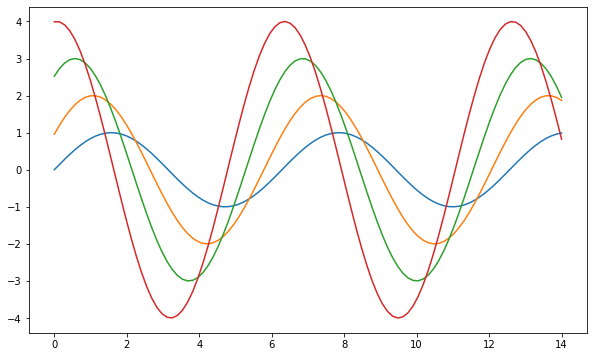

In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4) # 이게 무슨 의미일까요?

요렇게 사인 함수를 그려보았습니다. matplotlib보다 색감이 더 이쁘지 않나요? 좀 더 세련된 느낌이라서 좋아요.

아래는 배경을 흰색 그리드 배경으로 바꿀 수 있어요.

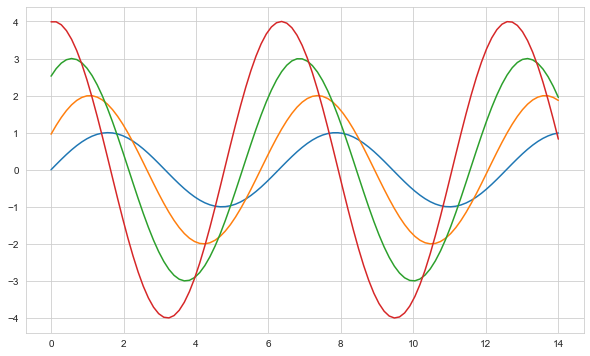

In [42]:
sns.set_style("whitegrid") 

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)

seaborn은 자체적으로 연습할 수 있는 데이터셋을 제공해요. 그래서 그 데이터셋을 가지고 연습해볼 수 있어요.

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
type(tips)  # 데이터프레임이네요.

pandas.core.frame.DataFrame

항상 어떤 데이터인지 확인해보는 습관 잊지마시고, 이 그래프가 무엇을 의미하는지 한번 생각해봅시다. tip? sex는 알겠고, smoker는 흡연 유무겠고, time은 시간인데 이게 뭘 의미하지? 

이건 요일별 점심, 저녁, 흡연 여부와 식사 금액(total_bill)과 tip을 정리한 데이터에요.

이것을 박스플롯으로 한번 그려볼게요.

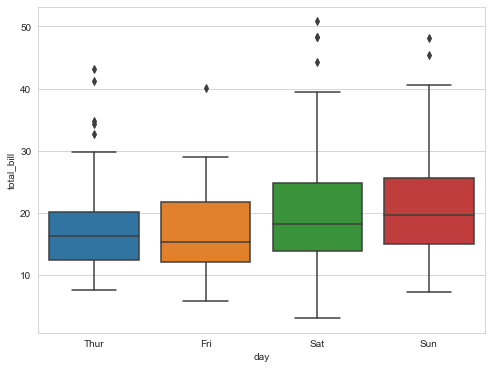

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

박스플롯은 이후 아주 많은 데이터들을 개괄해볼 때 유용한 시각화에요. 데이터가 어떤 형태를 띄고 있는지 확인할때 많이 사용합니다. 보통 데이터가 어떻게 생겼는지 확인한 다음에 boxplot을 한번씩 보는거 같아요.

이 그래프를 보면, 토요일-일요일, 주말에 평균적으로 사람들이 식사 금액으로 더 지출을 많이 하나 봅니다. 통계를 배우신 분들은 알 수도 있는데요, 저게 무엇을 의미하는지는 아래 그림을 이해해보세요.

<img src="https://camo.githubusercontent.com/62194f926ab124a42db79ead59c4d06f8866bf42/68747470733a2f2f696d67312e6461756d63646e2e6e65742f7468756d622f5237323078302e7138302f3f73636f64653d6d746973746f72793226666e616d653d687474702533412532462532466366696c6533302e75662e746973746f72792e636f6d253246696d61676525324639394542373533393544373539413139324143433730">

이것을 보면 아웃라이어를 금방 알 수 있어요. 위에 점 표시가 된게 보이죠? 이게 기존 데이터의 경향을 봤을 때, 경향을 벗어나는 아웃라이어 값들이에요. 나중에 머신러닝하면 요런 값들이 성능을 저하시키는 요인들이 될 수 있기 때문에 요것들을 계산하지 않거나 아예 스케일링을 log처리를 해주기도 합니다.

아래와 같이 hue를 사용하면 hue에 들어간 인자를 기준으로 박스플랏을 나눠 그릴 수도 있어요. palette는 색을 정하는 거에요.

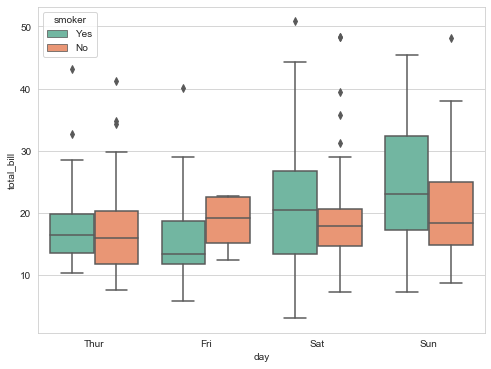

In [47]:
# 당근같은 느낌~
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", 
            hue="smoker", data=tips, palette="Set2")
plt.show()

오호, 주말에는 흡연자의 식사 평균 비용이 더 높네요. 스펙트럼도 더 넓구요.

지난 번에 matplotlib으로 힘들게 회귀선을 그려봤잖아요? 이번에는 seaborn이 스스로 회귀선까지 그려줘서 제공을 합니다.(왜 이거부터 안알려줬어요!!! - 인생이 원래 그래요.) 그게 lmplot이에요.

 - [seaborn - lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

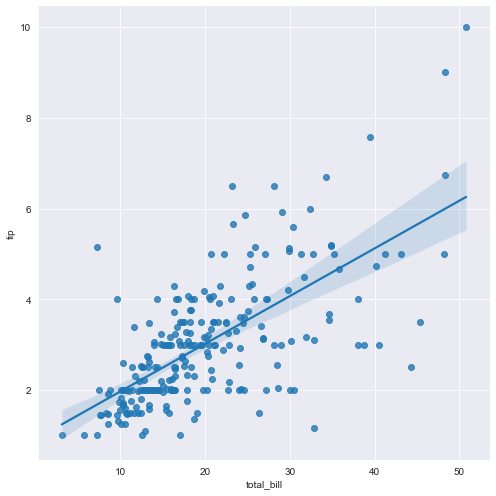

In [49]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill",y="tip", data=tips, height=7)
plt.show()

회귀선이 예쁘게 그려졌네요. 보니까 확실히 식사 총 비용이 높을수록, 팁을 더 많이 주는 경향이 있군요! 이 그래프의 장점은 ci(confidence interval) 즉, 신뢰구간까지 보여준다는 거에요. 옅은 파란색 면적 부분이 보이죠? 그게 바로 회귀추정치의 신뢰구간크기랍니다. 무척 편한 기능을 제공하죠?

아래는 또 hue를 설정하여 흡연 유무에 따라 회귀선을 그려볼 수 있어요.

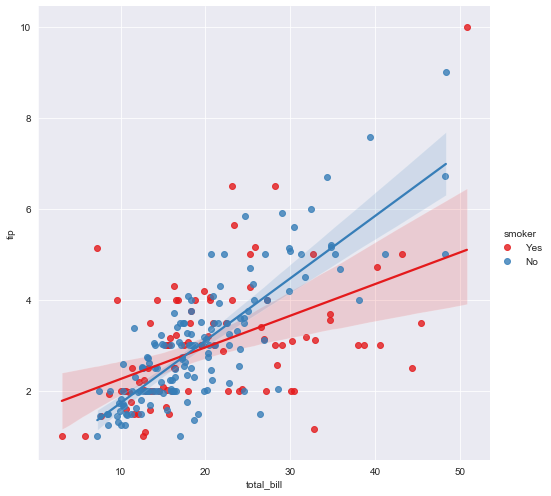

In [50]:
sns.lmplot(x="total_bill",y="tip", hue="smoker", 
           data=tips, palette="Set1", height=7)
plt.show()

담배피는 분들이 팁을 덜주는 경향이 있네요. 아무래도 드는 돈이 많아서 그런가ㅎㅎ

이번에는 연도 및 월별 항공기승객수 데이터로 시각화를 해볼게요.

In [51]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


pivot을 사용해서 x축은 연도, y축은 달로 바꿔 승객수를 나타내보도록 할게요.

In [52]:
flights = flights.pivot("month","year","passengers") # (index, column, values)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


오호, 연도가 갈수록 확실히 승객수가 많아지네요? 이런 경향성을 잘 볼 수 있도록 heatmap을 사용하여 시각화해볼게요.

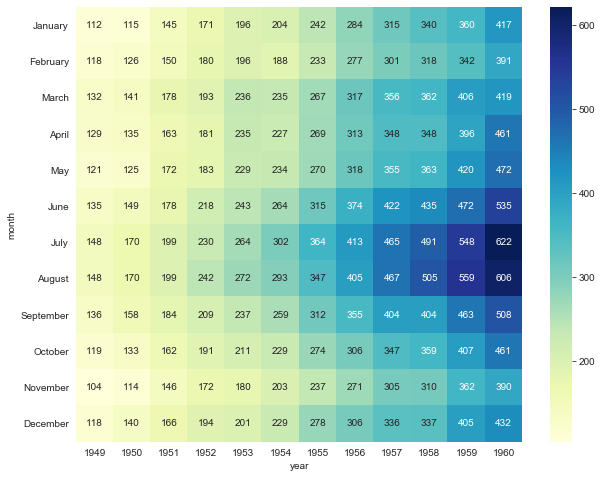

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

default color로 하면 승객수가 적은 곳이 진하게 나와서 cmap으로 색을 바꾸어 보았습니다. 한눈에 승객수 경향을 알아보기 쉽죠. 확실히 시각화를 하면 알아보기가 쉽습니다.

 - annot=True: 위에 승객수까지 표시되게 하는 것
 - fmt='d': 포매팅, 정수형태로 포매팅하라.
 
이번에는 머신러닝 거의 교과서급 예제인 아이리스꽃 데이터를 가져오도록 하겠습니다.

In [54]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


붓꽃의 꽃잎, 꽃받침의 너비와 폭을 가지고 붓꽃의 종류를 구분할 수 있는지 알아보는 데이터에요. 앞으로 엄청 많이 보게 될겁니다.ㅎㅎ

아래 pairplot을 명령하면 멋있는 그래프들이 나옵니다.

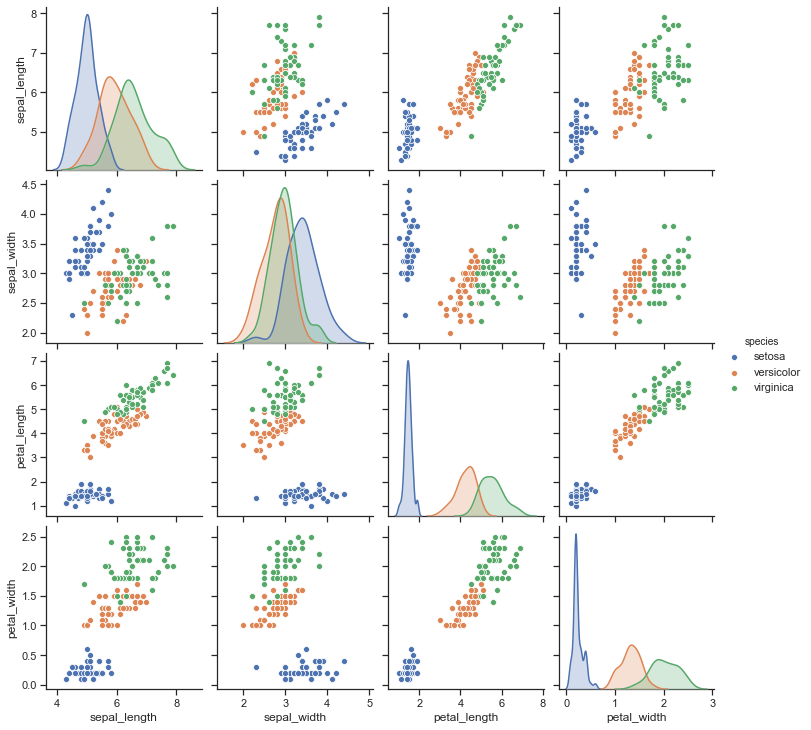

In [55]:
sns.pairplot(iris, hue="species")
plt.show()

## 3. 4. 범죄 데이터 시각화하기

자자 이제 seaborn으로 가공해놓은 데이터를 가지고 시각화해볼까요? matplotlib도 함께 써야 하니까 한글 폰드 문제부터 일단 해결합시당.

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [57]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


우선 먼저 강도, 살인, 폭력 간의 상관관계부터 볼까요? 아까 멋지구리했던 pairplot을 활용하여 나타내보도록 하겠습니다.

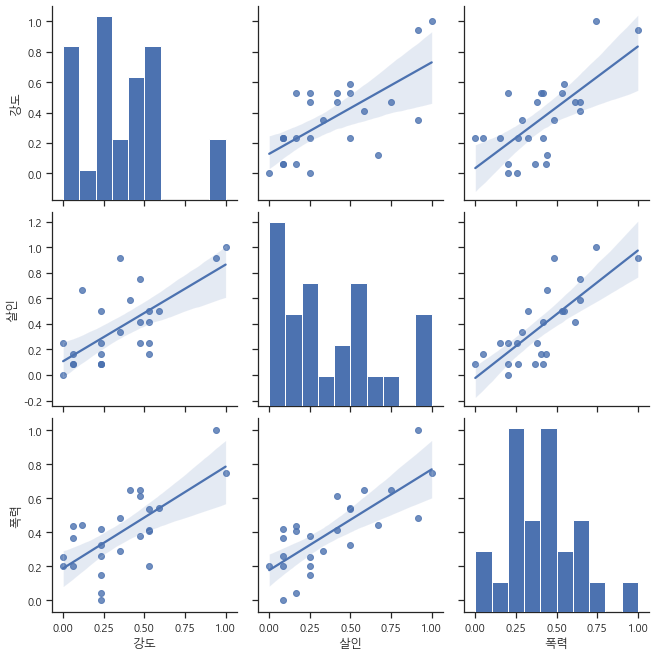

In [58]:
sns.pairplot(crime_anal_norm, vars=['강도','살인','폭력'],
             kind='reg', height=3) 
plt.show()

앞에서는 산점도가 나왔는데, 이번에는 kind='reg' 옵션을 주어 회귀regression 그래프로 나타나게 했어요. 강도-폭력, 살인-폭력, 강도-살인 모두 양의 상관관계를 보여주네요.

이번에는 인구수와 CCTV 개수를 x축, 살인과 강도를 y축에 두고 그래프를 그려 볼게요.

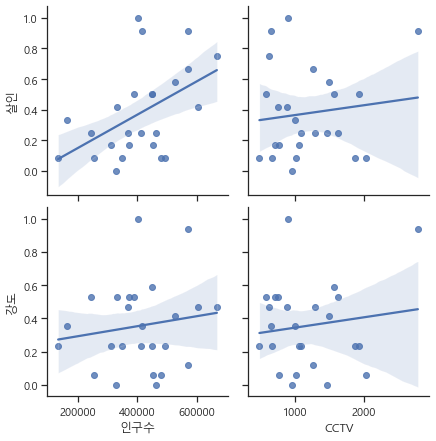

In [59]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인','강도'], kind='reg',height=3)
plt.show()

CCTV와 살인의 관계가 낮을지 몰라도 CCTV가 없을 때 살인이 많이 일어나는 구간이 있네요. 대체적으로 양의 상관관계를 보이고 있어요.

살인 및 폭력 검거율과 CCTV의 관계도 살펴볼게요.

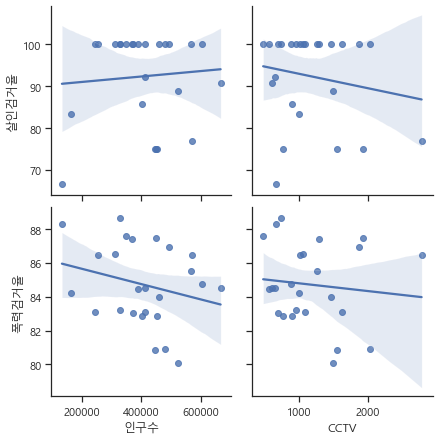

In [60]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인검거율','폭력검거율'], kind='reg',height=3)
plt.show()

????? CCTV-살인검거울, CCTV-폭력검거율, 인구수-폭력검거율은 음의 상관관계이네요. CCTV가 많다고 살인이나 폭력사건이 더 검거가 잘 되는 것은 아닌 가봐요. 아니면 CCTV가 있는 곳에서 범죄가 덜 일어나서 덜 검거했을 수도 있겠죠?

그럼 이제 heatmap으로 구별 검거율을 한번 살펴볼게요. 그 전에 정규화된 검거의 합으로 정렬하기 위해서 아래와 같이 가공을 해볼거에요.

In [61]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', 
                                                   ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


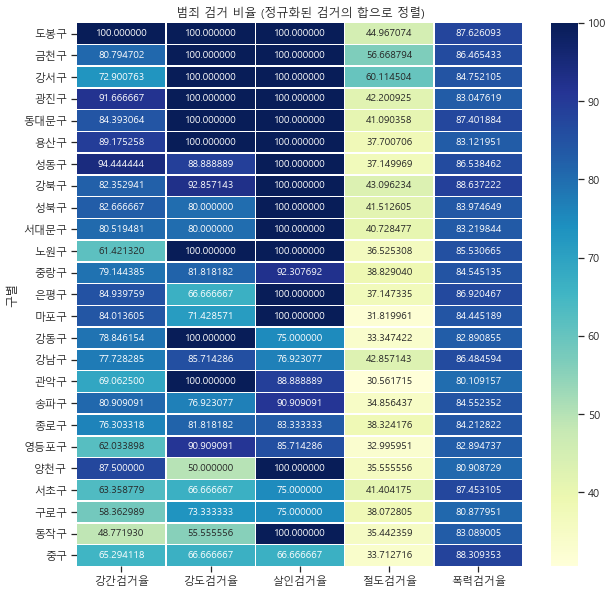

In [62]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, 
            fmt='f', cmap="YlGnBu", linewidths=.5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

결과적으로 보면 절도 검거율은 다른 범죄율에 비해 검거율이 낮습니다. 살인은 아무래도 다른 범죄들보다 무거운 범죄라 검거율이 높은 것 같구요.

지역별로 따져보면 도봉구, 광진구, 성동구가 검거율이 우수한 것 같습니다. 


잠깐, 우리의 가설은 강남 3구의 체감 안전도를 검증해보는 거였죠? 보니까 아래쪽에 서초구가 있네요. 그닥 좋은 것 같지는 않은데요. 송파구와 강남도 다른 구들에 비해 좋아보이지는 않네요.

이번에는 발생 건수의 합으로 정렬해서 heatmap으로 볼게요.

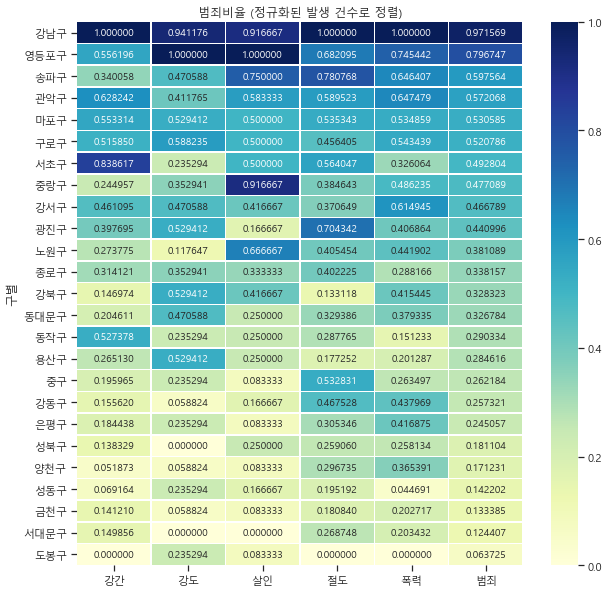

In [63]:
target_col = ['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, 
            fmt='f', cmap="YlGnBu", linewidths=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

발생건수로 보면 강남구, 양천구, 영등포구가 많은데, 강남 3구가 실제로 안전하게 보이는 것 같지는 않습니다. 강남구, 송파구, 서초구가 위쪽에 위치해 있으니까요... 의문이네요.

이쯤 했으니 이제까지 한 데이터를 저장해놓겠습니다. 아래 이름으로 저장이 됩니다.

In [64]:
crime_anal_norm.to_csv('02. crime_in_Seoul_final.csv', 
                       sep=',', encoding='utf-8')

## 3. 5. 지도 시각화 도구 Folium

이제는 지도에 직접 범죄율과 검거율 데이터를 시각화 해보려고 합니다. 지도 시각화 도구에는 여러가지가 있지만, 이 책에서는 Folium을 다루고 있어요. 우선 사용하기 전에 pip install folium을 터미널에서 해주시는 것 잊지 말구요.

In [65]:
import folium

map_osm = folium.Map([45.5236, -122.6750]) # 위도, 경도
map_osm

위도와 경도만 입력하면 이렇게 쉽게 시각화를 할 수 있습니다!

zoom을 해볼까요?

In [67]:
map_osm = folium.Map([45.5236, -122.6750], zoom_start=13) 
map_osm

In [68]:
# 흑백으로 보여주는 옵션
stamen = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', zoom_start=13)
stamen

원하는 위도와 경도에다가 화살표를 꽂을 수도 있어요.

In [69]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                   zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront' ).add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, 
                    popup='Laurelhurst Park', color='#3186cc', 
                    fill_color='#3186cc', ).add_to(map_2)
map_2

Marker 명령으로 마크 표시도 할 수 있고, CircleMarker 명령으로 반경(radius)과 색상(color)도 설정할 수 있어요.

tile에 다른 옵션을 주면 아래 지도처럼도 표시할 수 있구요.

In [70]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12,
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [71]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, 
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location', 
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)
map_1

### json을 활용한 지도 시각화

지도에서 각 구에 선그어주고 싶을 때에는 json 파일을 활용해요. json은 인간이 읽을 수 있는 text를 사용하여 만든 개방형 표준 데이터 포맷이에요. 여기서 시각화 해 볼 것은 2012년 10월 기준 미국의 주별 실업률이 있어요. 이것을 가지고 지도에 시각화해보려고 하는데요, 주별 실업률을 지도에 시각화하려면 주별 경도와 위도, 주별 고유 아이디, 주 이름 등이 있어야 겠죠?

 - folium_us-states.json
 - folium_US_Unemployment_Oct2012.csv
요 두 파일을 드라이브에서 다운받아 사용하면 됩니다. 우선은 실업률 데이터부터 볼게요.

In [72]:
# 2012년 10월 기준 미국 주별 실업률
state_unemployment = '02. folium_US_Unemployment_Oct2012.csv' 

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [73]:
state_geo = '02. folium_us-states.json'

map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
             columns=['State', 'Unemployment'],
             key_on='feature.id',
             fill_color='YlGn',
             legend_name='Unemployment Rate (%)')
map

C:\Users\jung6\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


state_geo 변수에 json 파일 경로를 담고, folium에서 choropleth 명령으로 json 파일과 지도에 표현하고 싶은 데이터를 입력하고, key_on 옵션으로 지도의 id를 알려주면 됩니다. key_ondms json 지도와 csv 매칭 시 사용할 데이터를 지정해줘요.

## 3. 6. 서울시 볌죄율에 대한 지도 시각화

그럼 이제 우리 데이터를 가지고 지도 시각화를 해보죠. 그런데 우리는 서울시 지도 경계선을 구획해주는 json 파일을 만들지 못하죠? 그러면 남이 쓴 것을 걍 가져다 쓰면 됩니다. 물론 허락받구요^^ 누구든 사용할 수 있도록 해놓은 것이 있으니 우리는 이것을 쓰면 됩니다. 드라이브에서 아래 파일 다운받기!

 - 1. skorea_municipalities_geo_simple.json

In [74]:
# json 파일 로딩하기 
import json
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

우선 살인 발생 건수부터 시각화해 볼게요. location에는 서울시 중심의 위도와 경보를 설정해주고요.

In [75]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['살인'],
              columns = [crime_anal_norm.index, crime_anal_norm['살인']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

강남도 보라색이고 송파도 남색.. 강남 3구가 살인 발생 건수에서 보면 안전하다고 보이지는 않네요.

그 다음에는 강간 발생 건수로 그려볼게요.

In [76]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['강간'],
              columns = [crime_anal_norm.index, crime_anal_norm['강간']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

???? 강남이랑 서초구가 굉장히 짙죠... 흠... 클럽이나 유흥 같은 상업구역이 많아서 그럴까요?

범죄 자체로만 한번 볼게요.

In [77]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['범죄'],
              columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

마찬가지로 강남 3구의 범죄 발생 건수가 작지 않네요.

그러나 인구수 대비 범죄 발생율을 비교해 봅시다. 인구수가 많아서 범죄 건수 자체가 많을 수도 있으니까요.

In [78]:
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = tmp_criminal,
              columns = [tmp_criminal.index, tmp_criminal],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

인구 대비로 봐도, 강남 3구가 안전도가 높다고 말하긴 어려울 것 같네요. 이렇게 기사를 검증해봤습니다!

## 3. 7. 서울시 경찰서별 검거율과 구별 범죄 발생율 동시에 시각화

경찰서별 검거율과 범죄 발생율을 동시에 표현해 봅시다. 우선 데이터에 경도와 위도를 칼럼으로 넣어주고요.

In [79]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914


숫자가 제일 큰 검거수로 정규화 해줍시다.

In [80]:
col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
    
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


그럼 이제 folium으로 경찰서에다가 마크 표시를 해볼게요. 위도와 경도는 이때 쓰려고 앞의 google maps에서 가져온 겁니다.

In [81]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n], 
                   crime_anal_raw['lng'][n]]).add_to(map)
    
map

검거에다가 적당한 값(10)을 곱해서 원 넓이를 정할게요. 경찰서의 검거율을 원의 넓이로 표현하는게 되겠죠? 그럼 경찰서의 위치에서 넓은 원을 가지면 검거율이 높다고 생각할 수 있겠습니다.

In [82]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                       radius = crime_anal_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc').add_to(map)
    
map

범죄 발생 건수도 함께 시각화해 보겠습니다.

In [83]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['범죄'],
              columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                       radius = crime_anal_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc').add_to(map)
    
map

C:\Users\jung6\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


범죄가 더 많이 일어날수록 짙은 색이고, 경찰서의 방어력 정도를 동그라미 원이라 볼 수 있겠네요. 그런데,,, 강남 3구는 검거(색깔)도 그렇고 방어율(동그라미)도 그렇고 그렇게 좋아보이지 않네요. 단순히 체감만 그런 것일까요. 

저자가 얘기하듯, 강남 3구에 유흥업소가 많이 있기 때문에 이런 시각화가 나온 것 같은데요. 생각해볼 거리가 많은 것 같지만, 강남 3구의 실제 체감안전도는 검증해본 것 같습니다.


## 프로젝트를 끝내며

첫번째와 두번째 프로젝트를 완성했습니다~ (짝짝짝) 첫번째 프로젝트에서는 추세선 만들기나 회귀가, 두번째에서는 정규화Normalization이 어려웠을 것 같아요. 최대한 이해를 해보시고 안되면 넘어가세요. 괜히 숫자나 스크롤에 압도되지 않으셔도 됩니다. 나중에 혼자 프로젝트를 진행할 때 사용할 내용만 남기면 충분합니다. 

전체 과정을 한번(여러번) 쭉 보시길 추천드립니다. 이런 식으로 데이터를 확인하고, 분석하기 좋게 칼럼을 조정하고, 그래프로 표현하는지 흐름을 아는 것이 중요하다고 생각합니다. 분석까지 가는 코드의 흐름을 느껴보세요. 그 다음에 세부적으로 왜 이 코드를 작성했는지, 어떤 방식으로 작성하는지 공부해 보세요.

질문을 많이 해주세요. 여러분이 헷갈리거나 모르는 것은 다른 분들도 같이 모르는니까 서로의 공부에 큰 도움이 된답니다.

숙제는 따로 없습니다. 다만 앞으로 여기서 사용된 판다스 기본 문법들이 자주 사용되니까 꼭 꼭 복습하시고 공부한 코드나 필기를 gdrive에 올려주세요! 프로젝트 완성하시느라 모두모두 고생했습니다. 그럼 안녕~~~~

p.s. 일요일 1시 발제에 참여하는거 잊지 마세요!